# Imports

In [1]:
import sys
sys.path.insert(0,'/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/')

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS
from scipy.ndimage import gaussian_filter

from minot.ClusterTools import map_tools
import pitszi

# Load a model

In [2]:
model = pitszi.Model(redshift=0.5, RA=109.3875*u.deg, Dec=37.754166*u.deg, silent=True)
model.map_reso = 2*u.arcsec
model.map_fov = 3*u.arcmin
model.los_reso = 12*u.kpc
model.los_size = 3*u.Mpc

model.coord

<SkyCoord (ICRS): (ra, dec) in deg
    (109.3875, 37.754166)>

# Get some data

In [3]:
hdul = fits.open('/Users/adam/Project/NIKA/Plots/MACSJ0717/SZbloc/MAPS_2mm_MACSJ0717.5+3745_v1.fits')
img  = hdul[0].data / (-12.0)
head = hdul[0].header
hdul.info()

Filename: /Users/adam/Project/NIKA/Plots/MACSJ0717/SZbloc/MAPS_2mm_MACSJ0717.5+3745_v1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (151, 151)   float64   
  1                1 ImageHDU        37   (151, 151)   float64   
  2                1 ImageHDU        37   (151, 151)   float64   
  3                1 ImageHDU        37   (151, 151)   float64   
  4                1 ImageHDU        37   (151, 151, 285)   float64   
  5                1 ImageHDU        37   (151, 151, 285)   float64   
  6                1 ImageHDU        37   (151, 151, 285)   float64   
  7                1 ImageHDU        37   (151, 151, 285)   float64   
  8                1 BinTableHDU     41   1R x 10C   [J, D, D, D, 285D, 285D, 285D, 3705A, E, E]   


# Define the data object

In [4]:
data = pitszi.Data(img, head)

In [5]:
data.set_nika2_reference_tf()

(0.0, 0.05)

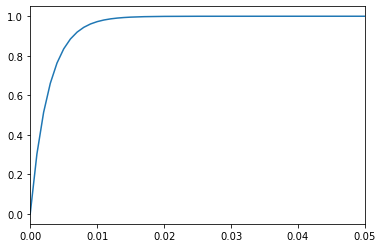

In [6]:
plt.plot(data.transfer_function['k'], data.transfer_function['TF'])
plt.xlim(0, 0.05)

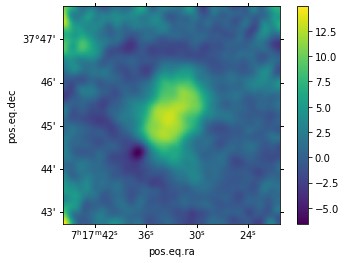

In [7]:
ax = plt.subplot(1, 1, 1, projection=WCS(data.header))
plt.imshow(gaussian_filter(data.image, sigma=3)*1e5)
plt.colorbar()

In [8]:
mock_data = data.set_image_to_mock(model, use_model_header=False)

<SkyCoord (ICRS): (ra, dec) in deg
    (109.3875, 37.754166)>
<SkyCoord (ICRS): (ra, dec) in deg
    (109.3875, 37.75416667)>


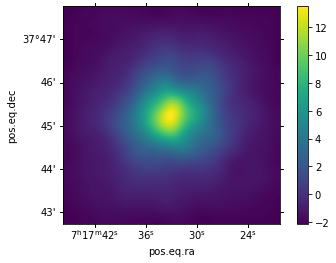

In [9]:
ax = plt.subplot(1, 1, 1, projection=WCS(data.header))
plt.imshow(data.image*1e5)
plt.colorbar()